# Big Data w biznesie

## Trzeci notebook rozwiązania

In [4]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """

   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles
   return HTML(s)
_set_css_style("../custom.css")

#### Zaimportuj biblioteki numpy, pandas, matplotlib i seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Załaduj plik csv.
***
Do zmiennej `df` załaduj plik `cars.csv`.

In [2]:
df = pd.read_csv("./cars.csv")

#### Wyświetl pierwsze 5 linijek obiektu ''df''.

In [3]:
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


#### Narysuj wykres pudełkowego
***
Narysuj wykres, który przedstawi zależność typu silnika od ceny.

In [ ]:
sns.boxplot(x='engine_type', y='price_usd', data=df)
plt.show()

<AxesSubplot: title={'center': 'price_usd'}, xlabel='engine_type'>

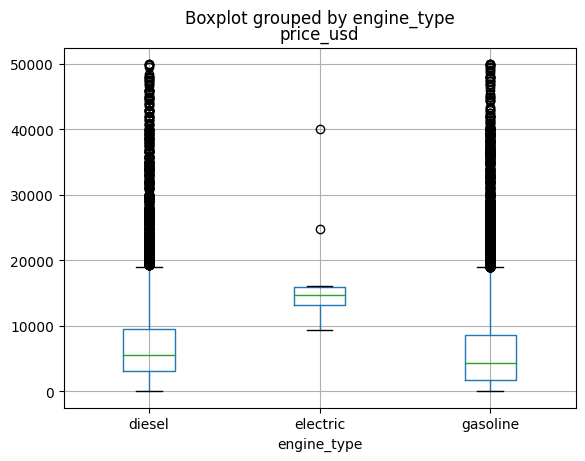

In [10]:
df.boxplot(
        by='engine_type',
        column='price_usd')

#### Popraw wykres pudełkowego
***
Popraw wykres, tak żeby zakres cen na wykresie zaczynał się od 0.

In [ ]:
sns.boxplot(x='engine_type', y='price_usd', data=df)
plt.ylim(0,)
plt.show()

#### Stwórz dummy variables.
***
Stwórz obiekt `dummy_variable` z danych w kolumnie `'engine_type'`.

In [ ]:
dummy_variable = pd.get_dummies(df['engine_type'])
dummy_variable

#### Zmień nazwy kolumn w dummy variables.
***
Zmień nazwy kolumn w obiekcie `dummy_variable`, tak żeby każda kolumna zaczynała się od `'engine_type-'`.

In [ ]:
rename_dict = df['engine_type'].value_counts().index.tolist()
dummy_variable = dummy_variable.rename(columns={x:f'engine_type-{x}' for x in rename_dict})
dummy_variable

#### Dodaj dummy variables do DataFrame'a.
***
Połącz ze sobą stworzony obiekt `'dummy viariable'` z obiektem `'df'`.

In [ ]:
df = pd.concat([df, dummy_variable], axis=1)
df

#### Stwórz pivot table.
***
Stwórz tabelę, która będzie obrazować jak typ karoserii (`'body_type'`) i kolor wypływają na średnią długość łącznego czasu wystawienia (`'duration_listed'`)

In [ ]:
pivot_table = pd.pivot_table(df, values='duration_listed', index='body_type', columns='color', aggfunc='mean')
pivot_table

#### Wypełnij brakujące wartości w pivot table.
***
Wszystkie komórki z brakującymi wartościami wypełnij średnią długością łącznego czasu wystawienia dla samochodów o takim samym typie karoserii.

In [ ]:
pivot_table = pivot_table.apply(lambda row: row.fillna(row.mean()), axis=1)
pivot_table

#### Stwórz pivot table innym sposobem.
***
Najpierw pogrupuj dane po kolumnach `'body_type'` i `'color'`, a następnie dla każdej grupy policz średnią długość łącznego czasu wystawienia.

Następnie przekształć ten obiekt w pivot table za pomocą metody `df.pivot()`.

In [ ]:
df_pivot = df.groupby(['body_type', 'color'], as_index=False)['duration_listed'].mean()
df_pivot_table = df_pivot.pivot(index='body_type', columns='color')
df_pivot_table

#### Zastosuj stylowanie.
***
Weź stworzony komórkę wyżej obiekt (`df_pivot_table`) i zastosuj na nim stylowanie z następującymi elementami:
- tytuł wykresu
- tło komórki ma mieć różny kolor w zależności od wielkości w komórce
- sformatowane wartości w komórce (liczby całkowite bez przecinka, wartości brakujące jaki napis "brak"
- podświetlenie największych wartości
- ustawienie odpowiednich marginesów w komórkach (padding)

In [ ]:
## styling
df_pivot_table\
    .style\
    .format('{:.0f}', na_rep="")\
    .background_gradient(cmap="Blues")\
    .set_caption("Tabela 1. Średni czas trwania Długość ")\
    .set_table_styles([{'selector': 'th',
                        'props': [('font-weight', 'bold'),
                                  ('text-align', 'center'),
                                  ('font-size', '13pt')]},
                       {'selector': 'caption',
                        'props': [('font-weight', 'bold'),
                                  ('color', 'white'),
                                  ('font-size', '16pt')]}])\
    .highlight_min(color="Red")\
    .highlight_max(color="Green")\
    .set_properties(padding='8px 20px')

#### Narysuj heatmapę wartości z pivot table.
***

In [ ]:
sns.heatmap(pivot_table, cmap='gray')
plt.show()

#### Stwórz scatter plot przy pomocy pandasa.
***
Zobrazuj zależność pomiędzy przebiegiem a ceną, używając do tego funkcji z biblioteki pandas.

In [ ]:
ax = df.plot(kind='scatter',
                 x='odometer_value',
                 y='price_usd',
                 title='Odometer and Price')

#### Stwórz scatter plot przy pomocy matplotliba.
***
Zobrazuj zależność pomiędzy przebiegiem a ceną, używając do tego funkcji z biblioteki matplotliba.

In [ ]:
plt.scatter( df['odometer_value'], df['price_usd'])
plt.show()

#### Stwórz scatter plot przy pomocy seaborna.
***
Zobrazuj zależność pomiędzy przebiegiem a ceną, używając do tego funkcji z biblioteki seaborna.

In [ ]:
sns.scatterplot(x='odometer_value', y='price_usd', data=df)
plt.show()

#### Popraw scatter plot przy pomocy seaborna.
***
Zmniejsz rozmiar znaczników i zmień ich kolor na zielony. Ogranicz oś x i y tak, żeby zaczynały się od zera. Usuń obwódkę wokół znaczników (`edgecolor`). Usuń ramkę wokół wykresu (`sns.despine`).

In [ ]:
sns.scatterplot(x='odometer_value', y='price_usd', data=df, s=4, color='green', edgecolor=None)
sns.despine()
plt.xlim(0,)
plt.ylim(0,)
plt.show()

#### Podziel na biny.
***
Podziel wartości cen samochodów na 5 binów ('Low', 'Medium-Low', 'Medium', 'Medium-High', 'High').

In [ ]:
bins = np.linspace(min(df['price_usd']), max(df['price_usd']), 6)

#### Rozdziel na biny.
***
Stwórz nową kolumnę `'price_usd_binned'` i przyporządkuj każdą wartość do jednego z 5 binów ('Low', 'Medium-Low', 'Medium', 'Medium-High', 'High').

In [ ]:
group_names = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']
df['price_usd_binned'] = pd.cut(df['price_usd'], bins, labels=group_names, include_lowest=True )
df[['price_usd','price_usd_binned']].head(20)

#### Narysuj histogram z binami za pomocą pandasa.
***
Stwórz histogram, który sam podzieli wartości z kolumny `'price_usd'` na 5 binów.

In [ ]:
df.plot.hist(y='price_usd', bins=5)

#### Narysuj histogram z binami za pomocą matplotliba.
***
Stwórz histogram, który sam podzieli wartości z kolumny `'price_usd'` na 5 binów.

In [ ]:
plt.hist(df['price_usd'], bins=5)
plt.show()

#### Narysuj histogram z binami za pomocą matplotliba.
***
Stwórz histogram wartości z kolumny `'price_usd_binned'`.

In [ ]:
plt.hist(df['price_usd_binned'])
plt.show()

#### Narysuj histogram z binami za pomocą seaborna.
***
Stwórz histogram, który sam podzieli wartości z kolumny `'price_usd'` na 5 binów.

In [ ]:
sns.histplot(x='price_usd', data=df, bins=5)
plt.show()

#### Narysuj histogram z binami za pomocą seaborna.
***
Stwórz histogram wartości z kolumny `'price_usd_binned'`.

In [ ]:
sns.histplot(x='price_usd_binned', data=df)
plt.show()

#### Zmień histogram z binami za pomocą seaborna.
***
Nadaj tytuł wykresowi, obróć nazwy binów o 90 stopni, zmień kolor słupków na czerwony, pogrub kontur słupków i zmień kolor konturu na czarny.

In [ ]:
sns.histplot(x='price_usd_binned', data=df, color='red',  edgecolor='black', linewidth=5)
plt.xticks(rotation=90)
plt.title('Histogram cen samochodów')
plt.show()

#### Pokaż na wykresie, której wartości danych jest najwięcej.
***
Pokaż na wykresie, której marki samochodów jest najwięcej.
NIE używaj do tego `sns.histplot()`.

In [ ]:
sns.countplot(x='manufacturer_name', data=df)
plt.show()

In [ ]:
sns.regplot(x="number_of_photos", y="duration_listed", data=df, scatter_kws={'s': 2}, line_kws={'color': 'red', 'lw': 2})
plt.xlim(df["number_of_photos"].min(), df["number_of_photos"].max())
plt.ylim(0, )
plt.show()

#### Popraw wykres, przedstawiający której wartości danych jest najwięcej.
***
Zmień podpisy przy osi x, żeby na nachodziły na siebie (obróć i zmniejsz czcionkę).
Ustaw słupki według malejącej liczby wystąpień - argument `'order'` (`df['manufacturer_name'].value_counts().index` zwraca listę kolumny w kolejności, jeśli chodzi o malejącą liczbę wystąpień).

In [ ]:
sns.countplot(x='manufacturer_name', data=df, order=df['manufacturer_name'].value_counts().index)
plt.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90)
plt.show()

#### Policz korelacje.
***
Policz korelację między wszystkimi kolumnami zawierającymi dane numeryczne.

In [ ]:
df.corr(numeric_only=True)

#### Narysuj heatmapę korelacji.
***
Spróbuj różnych wartości argumentu `'cmap'`.

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap='Greens')
plt.show()

#### Narysuj wykres dla dwóch zmiennych z dodatnią korelacją.
***
Na heatmapie znajdź dwie zmienne z dodatnią korelacją.
Narysuj ich wykres wraz z linią regresji.
Zmień kolor linii regresji na czerwony i upewnij się, że osie x i y zaczynają się i kończą przy odpowiednich wartościach.

In [ ]:
sns.regplot(x="up_counter", y="duration_listed", data=df, scatter_kws={'s': 2}, line_kws={'color': 'red', 'lw': 2})
plt.xlim(df["up_counter"].min(), df["up_counter"].max())
plt.ylim(0, )
plt.show()

#### Narysuj wykres dla dwóch zmiennych z korelacją bliską zera.
***
Na heatmapie znajdź dwie zmienne z korelacją bliską zera.
Narysuj ich wykres wraz z linią regresji.
Zmień kolor linii regresji na czerwony i upewnij się, że osie x i y zaczynają się i kończą przy odpowiednich wartościach.

#### Narysuj wykres dla dwóch zmiennych z ujemną korelacją.
***
Na heatmapie znajdź dwie zmienne z ujemną korelacją.
Narysuj ich wykres wraz z linią regresji.
Zmień kolor linii regresji na czerwony i upewnij się, że osie x i y zaczynają się i kończą przy odpowiednich wartościach.

In [ ]:
sns.regplot(x="odometer_value", y="price_usd", data=df, scatter_kws={'s': 2}, line_kws={'color': 'red', 'lw': 2})
plt.xlim(df["odometer_value"].min(), df["odometer_value"].max())
plt.ylim(0, )
plt.show()

#### Wybierz dane dla konkretnej marki samochodu
***
Stwórz nowy obiekt `'df_manufacturer'`, w którym będą znajdować się tylko samochody marki `'Land Rover'`.

In [ ]:
df_manufacturer = df.query('manufacturer_name == "Land Rover"')
df_manufacturer

#### Podziel dane ze względu na model samochodu.
***
Pogrupuj dane ze względu na model samochodu i dla każdej podgrupy policzyć średnią cenę i liczbę obiektów w danej podgrupie.

In [ ]:
df_manufacturer.groupby('model_name')['price_usd'].agg(['mean', 'count'])

#### Stwórz wykres skrzypcowy przedstawiający rozkład cen ze względu na model samochodu
***
Korzystając z danych zawartych w obiekcie `'df_manufacturer'`, zwizualizuj rozkład cen w zależności od modelu.

In [ ]:
sns.violinplot(x='model_name', y='price_usd', data=df_manufacturer)
plt.show()

#### Popraw wykres skrzypcowy przedstawiający rozkład cen ze względu na model samochodu
***
Zmniejsz grubość konturów, ogranicz oś y, żeby zaczynała się w zerze, zmień podpisy przy osi x, żeby na nachodziły na siebie.

In [ ]:
sns.violinplot(x='model_name', y='price_usd', data=df_manufacturer, linewidth=1, edgecolor='black')
plt.ylim(0,)
plt.xticks(rotation=90)
plt.show()

#### Skorzystaj z catplot, żeby stworzyć kilka wykresów skrzypcowych.
***
Wykresy skrzypcowe mają ilustrować rozkład przebiegu (`'odometer_value'`) w zależności od rodzaju napędu (`'drivetrain'`) i rodzaju skrzyni biegów (`'transmission'`). W każdej kolumnie będzie osobny wykres dla każdego rodzaju silnika (`'engine_type'`).

In [ ]:
sns.catplot(x='drivetrain', y='odometer_value', hue='transmission', kind='violin', col='engine_type', data=df, palette='seismic')
plt.ylim(0,)
plt.show()